#Importing Libraries:

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

#Importing DataSet:

In [13]:
file=pd.read_csv("pokemon.csv")
file.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
file.shape

(801, 41)

In [4]:
file.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [5]:
file.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


#Filling Nan Values with mean & mode:

In [6]:
for i in file.columns:
        if any(file[i].isnull()):
            if file[i].dtype=='int64' or file[i].dtype=='float64' :
                 file[i].fillna(file[i].mean(),inplace=True)
            if file[i].dtype=='object':
                 file[i].fillna(file[i].mode().iloc[0],inplace=True)
file=file.drop_duplicates()
file.shape

(801, 41)

#Creating Pairplot using Seaborn with type_1:

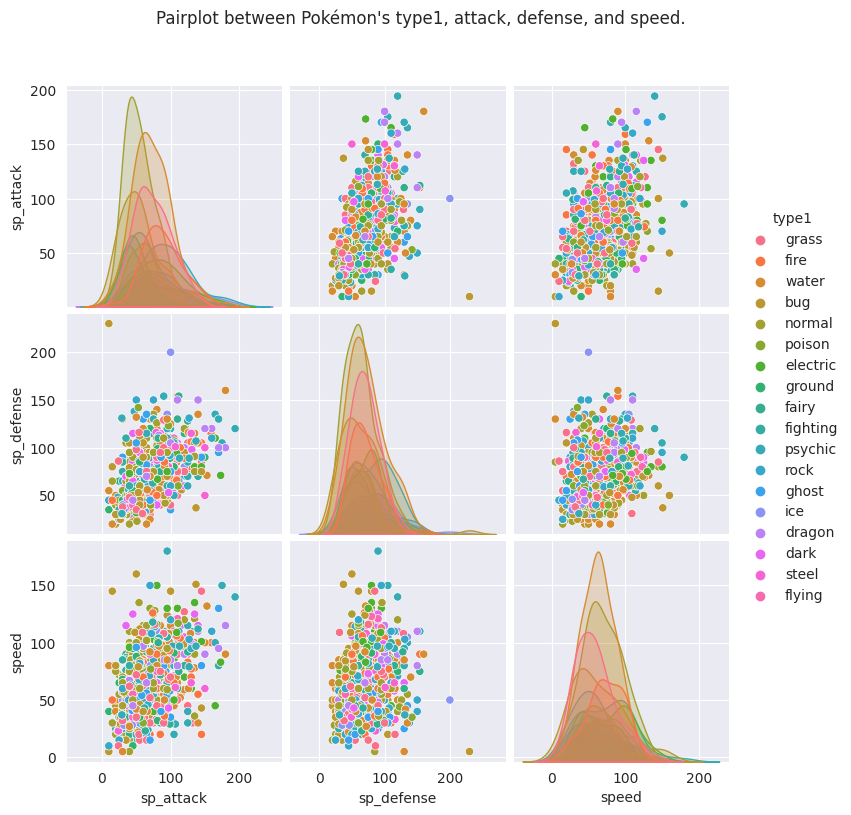

In [22]:
columns=['type1','type2','sp_attack','sp_defense','speed']
g = sns.pairplot(file[columns],hue='type1')
g.fig.suptitle("Pairplot between Pokémon's type1, attack, defense, and speed.",y=1.08)
plt.show()

#Creating Pairplot using Seaborn with type_2:

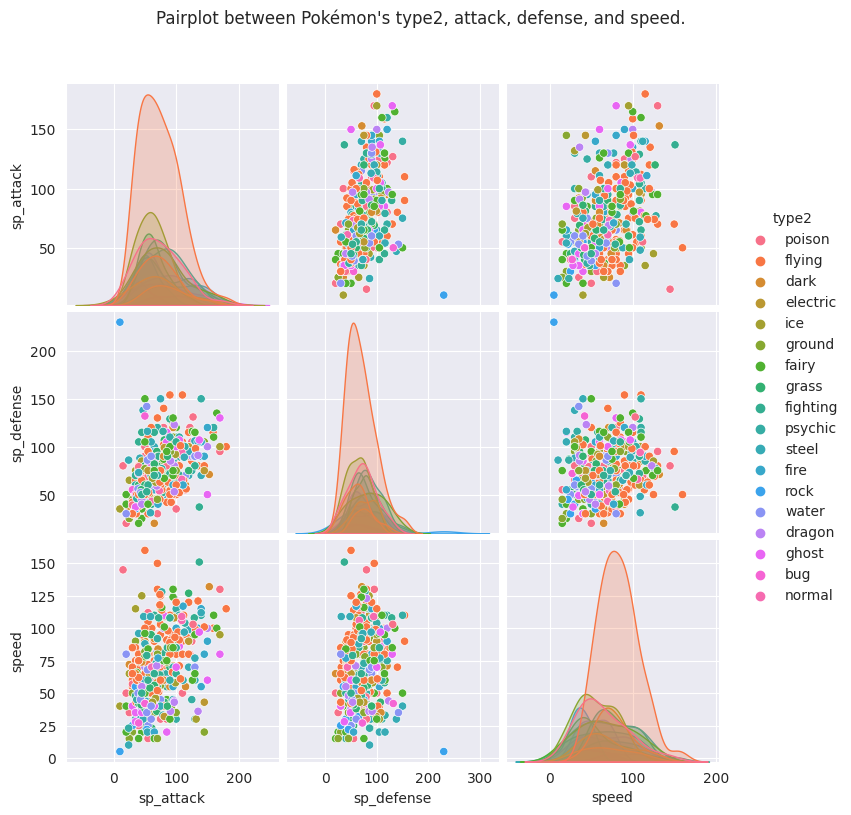

In [24]:
columns=['type1','type2','sp_attack','sp_defense','speed']
g = sns.pairplot(file[columns],hue='type2')
g.fig.suptitle("Pairplot between Pokémon's type2, attack, defense, and speed.",y=1.08)
plt.show()

# Question 1: Number of legendary Pokémon per generation


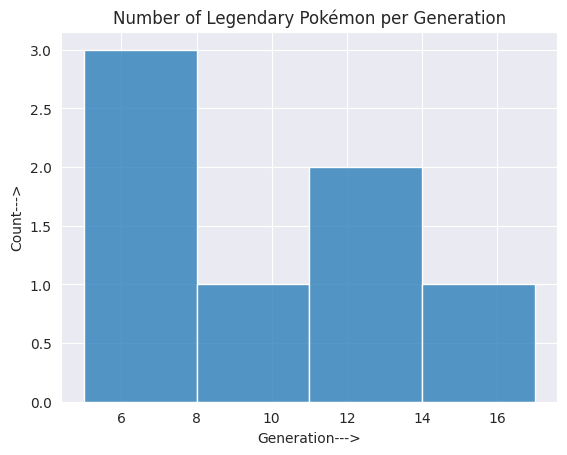

In [67]:
legendary_counts = file[file['is_legendary'] == 1].groupby('generation').size()
sns.histplot(legendary_counts)
plt.xlabel('Generation--->')
plt.ylabel('Count--->')
plt.title('Number of Legendary Pokémon per Generation')
plt.show()

# Question 2: Average weight of Pokémon by generation

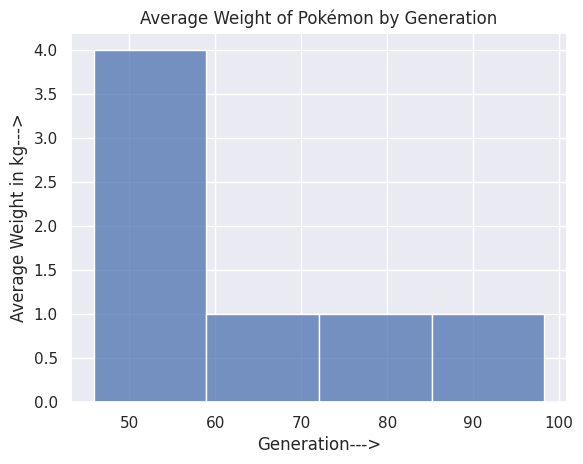

In [100]:
average_weight = file.groupby('generation')['weight_kg'].mean()
sns.histplot(average_weight)
plt.xlabel('Generation--->')
plt.ylabel('Average Weight in kg--->')
plt.title('Average Weight of Pokémon by Generation')
plt.show()

# Question 3: Correlation between attack and defense stats

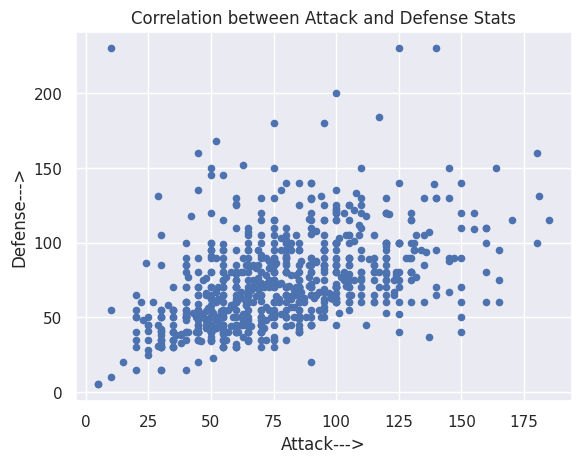

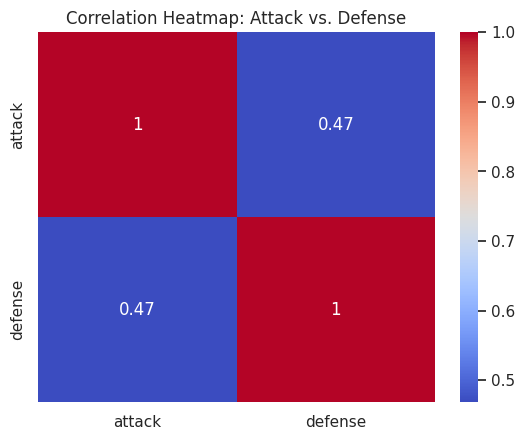

In [105]:

file.plot(x='attack', y='defense', kind='scatter')
plt.xlabel('Attack--->')
plt.ylabel('Defense--->')
plt.title('Correlation between Attack and Defense Stats')
plt.show()

sns.heatmap(file[ ['attack','defense']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Attack vs. Defense')
plt.show()

Question 4: Evolution of Pokémon speed over generations


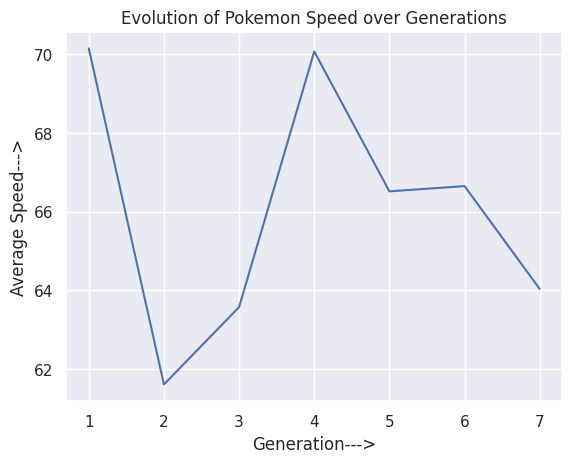

In [106]:
speed_by_generation =file.groupby('generation')['speed'].mean()
sns.lineplot(speed_by_generation)
plt.xlabel('Generation--->')
plt.ylabel('Average Speed--->')
plt.title('Evolution of Pokemon Speed over Generations')
plt.show()



# Question 5:Top 5  most common type combinations among Pokémon

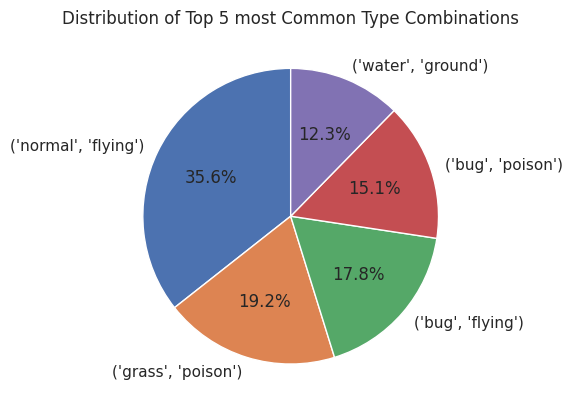

In [107]:
type_combinations = file.groupby(['type1', 'type2']).size().nlargest(5)
plt.pie(type_combinations.values, labels=type_combinations.index, startangle=90,autopct='%1.1f%%')
plt.title('Distribution of Top 5 most Common Type Combinations')
plt.show()